# Deep State Space Models for Time Series Forecasting

```bib
@inproceedings{NEURIPS2018_5cf68969,
 author = {Rangapuram, Syama Sundar and Seeger, Matthias W and Gasthaus, Jan and Stella, Lorenzo and Wang, Yuyang and Januschowski, Tim},
 booktitle = {Advances in Neural Information Processing Systems},
 editor = {S. Bengio and H. Wallach and H. Larochelle and K. Grauman and N. Cesa-Bianchi and R. Garnett},
 pages = {},
 publisher = {Curran Associates, Inc.},
 title = {Deep State Space Models for Time Series Forecasting},
 url = {https://proceedings.neurips.cc/paper_files/paper/2018/file/5cf68969fb67aa6082363a6d4e6468e2-Paper.pdf},
 volume = {31},
 year = {2018}
}
```

## 1. どんなもの？
Recurrent neural networkを用いてlinear SSM(Space State Model)のパラメータを特定する方法の提案。

## 2. 先行研究と比べるとどこが凄い？  
SSMには解釈性は高いものの、複雑な時間経過のパターンを学習させることができなかった。Recurrent neural networkは複雑な時間経過のパターンを学習させることができるが、解釈性が低かった。本研究では、Recurrent neural networkの性質によって複雑な時間経過のパターンを学習し、SSMの性質によって解釈を得ることができる。また、大規模データにも対応し、過学習にも強い。

## 3. 技術や手法のキモはどこ？
単変量の時系列データ$\{z_{1:T_{i}}^{(i)} \}_{i=1}^{T}$が与えられたとする。さらに状態を$\{\mathbf{x}_{1:T_{i}+\tau}^{(i)} \}_{i=1}^{T}$とする。目的は将来の軌跡の確率分布であり  

$$
p\biggl( z_{T_{i}+1:T_{i}+\tau}^{(i)} \bigg\lvert z_{i:T_{i}}^{(i)}, \mathbf{x}_{i:T_{i}+\tau}^{i} ; \Phi \biggr)
$$  
  
ここでの$\Phi$は学習させるパラメータ。ここで$\{1, 2, \dots, T_{i}\}$を訓練データ、$\{T_{i}, T_{i+1}, \dots, T_{\tau}\}$を予測データとする。この論文のアプローチでは$\Phi$はすべての時点で同じとする。

### 状態空間モデル  
状態方程式を  

$$
\mathbf{l_{t}} = \mathbf{F_{t}l_{t-1}} + \mathbf{g_{t}} \epsilon_{t}, \\
\epsilon \sim \mathcal{N}(0, 1), \\
\mathbf{l_{0}} \sim \mathcal{N}(\mathbf{\mu_{0}}, \text{diag}(\mathbf{\sigma}_{0}^2)),
$$
  
とする。ただし、$\mathbf{F_{t}}$は状態遷移状列、$\mathbf{g_{t}}$はinnovation strength。  
さらに観測方程式を
  
$$
z_{t} = y_{t} + \sigma_{t} \epsilon_{t}, \\
y_{t} = \mathbf{a_{t}}^\top \mathbf{l_{t-1}} + b_{t}, \\
\epsilon_{t} \sim \mathcal{N}(0, 1),
$$
  
とする。ただし$\mathbf{a_{t}}^\top \in \mathbb{R}, \sigma_{t} \in \mathbb{R}_{>0}, b_{t} \in \mathbb{R}$はモデルのパラメータ。  
状態空間モデルのパラメータをまとめて$\Theta_{t} = (\mathbf{\mu_{0}}, \mathbf{\Sigma_{0}}, \mathbf{F_{t}}, \mathbf{g_{t}}, \mathbf{a_{t}}, b_{t}, \sigma_{t}), \forall{t} > 0$とする。古典的な設定では、パラメータは時変量なので$\Theta_{t} = \Theta, \forall{t} > 0$となる。  
パラメータを学習させる古典的な方法は最尤推定で、
  
$$
\Theta_{1:T}^{*} = \text{argmax}_{\Theta_{1:T}}p_{ss}(z_{1:T} |\Theta_{1:T}), \\
p_{ss} = p(z_{1}|\Theta{1}) \prod_{t=2}^{T} p(z_{t}|z_{1:t-1}, \Theta_{1:t}) = \int{p(\mathbf{l_{0}})\Biggl\lbrack{\prod_{t=1}^{T}p(z_{t}|\mathbf{l_{t}})p(\mathbf{l}_{t}|\mathbf{l}_{t-1})}}\Biggr \rbrack
$$
  
複数の時系列に対してパラメータの推定を行うとき、パラメータはそれぞれの時系列に対して独立に推定させるため、複数の時系列に渡る情報を共有できない。

### Deep State Space Model
訓練: LSTMの出力層をパラメータとする。対数尤度の和を損失関数とする。

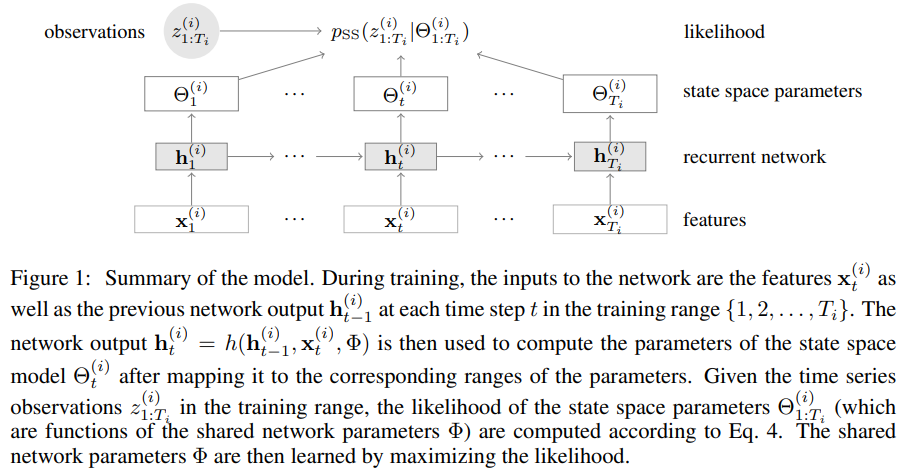

予測: 逐次的に求める(カルマンフィルタ?)  
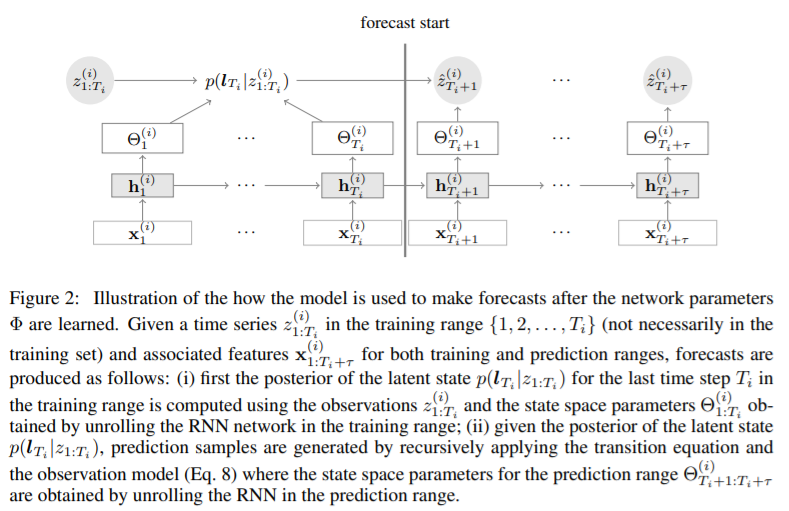

## 4. どうやって有効だと検証した？
人工データと自然データで実験、SOTA.

## 5. 議論はある？


## 6. 次に読むべき論文は？
* [A Disentangled Recognition and Nonlinear Dynamics Model for Unsupervised Learning](https://arxiv.org/abs/1710.05741)(most relevant)
* [Structured Inference Networks for Nonlinear State Space Models](https://arxiv.org/abs/1609.09869)
* [Time-series extreme event forecasting with neural networks at Uber](https://www.uber.com/blog/research/time-series-extreme-event-forecasting-with-neural-networks-at-uber)
* [State Space LSTM Models with Particle MCMC Inference](https://arxiv.org/abs/1711.11179)

## 7. 実装
https://github.com/awslabs/gluonts  
(特にsrc/gluonts/mx/model/deepstate/_network.py)